In [3]:
# Este ambiente Python 3 vem com muitas bibliotecas analíticas úteis instaladas
# É definido pela imagem do docker kaggle/python: https://github.com/kaggle/docker-python
# Por exemplo, aqui estão vários pacotes úteis para carregar


import numpy as np 
# albegra linear
import pandas as pd
 # processamento de dados, E/S de arquivo CSV (por exemplo, pd.read_csv)

# Os arquivos de dados de entrada estão disponíveis no diretório "../input/".
# Por exemplo, executar isso (clicando em executar ou pressionando Shift+Enter) listará os arquivos no diretório de entrada
import h5py

# from google.colab import drive
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Any results you write to the current directory are saved as output.

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainFile = h5py.File('./train_happy.h5')
testFile = h5py.File('./test_happy.h5')

In [ ]:
train_x = np.array(trainFile['train_set_x'][:])
train_y = np.array(trainFile['train_set_y'][:])

test_x = np.array(testFile['test_set_x'][:])
test_y = np.array(testFile['test_set_y'][:])

In [ ]:
print(train_x.shape)
print(train_y.shape)

(600, 64, 64, 3)
(600,)


In [ ]:
print(test_x.shape)
print(test_y.shape)

(150, 64, 64, 3)
(150,)


In [ ]:
train_y = train_y.reshape((1, train_y.shape[0]))
test_y = test_y.reshape((1, test_y.shape[0]))

print(train_y.shape)
print(test_y.shape)

(1, 600)
(1, 150)


In [ ]:
print(train_y)

[[0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1
  0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1
  0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0
  1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0
  0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1
  0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0
  1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1
  1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0
  1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1
  0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1
  0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1
  1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0
  1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 

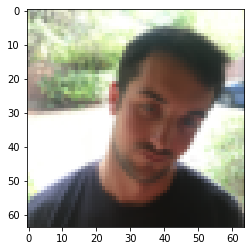

In [ ]:
plt.imshow(train_x[0])

In [ ]:
X_train = train_x / 255.0
X_test = test_x / 255.0

y_train = train_y.T
y_test = test_y.T


In [ ]:
# print(y_train)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='Same', input_shape=(64,64,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='Same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='Same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 30
batch_size = 30

In [ ]:
history = model.fit(x=X_train, y=y_train, epochs=epochs, verbose=2,batch_size=batch_size)

Epoch 1/30


In [ ]:
test_score = model.evaluate(X_test, y_test, verbose=1)

In [ ]:
print('test loss:', test_score[0])
print('test accuracy:', test_score[1])

In [ ]:
training_accuracy = history.history['accuracy']
training_loss = history.history['loss']

E = range(len(training_accuracy))
plt.plot(E, training_accuracy, color='red', label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(E, training_loss, color='red', label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()